<a href="https://colab.research.google.com/github/sadaqatali1234/Deep-learning-assigments/blob/main/Car_Price_Prediction_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Car Price Prediction::

Download dataset from this link:

https://www.kaggle.com/hellbuoy/car-price-prediction

# Problem Statement::

A Chinese automobile company Geely Auto aspires to enter the US market by setting up their manufacturing unit there and producing cars locally to give competition to their US and European counterparts.

They have contracted an automobile consulting company to understand the factors on which the pricing of cars depends. Specifically, they want to understand the factors affecting the pricing of cars in the American market, since those may be very different from the Chinese market. The company wants to know:

Which variables are significant in predicting the price of a car
How well those variables describe the price of a car
Based on various market surveys, the consulting firm has gathered a large data set of different types of cars across the America market.

# task::
We are required to model the price of cars with the available independent variables. It will be used by the management to understand how exactly the prices vary with the independent variables. They can accordingly manipulate the design of the cars, the business strategy etc. to meet certain price levels. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

# WORKFLOW ::

1.Load Data

2.Check Missing Values ( If Exist ; Fill each record with mean of its feature )

3.Split into 50% Training(Samples,Labels) , 30% Test(Samples,Labels) and 20% Validation Data(Samples,Labels).

4.Model : input Layer (No. of features ), 3 hidden layers including 10,8,6 unit & Output Layer with activation function relu/tanh (check by experiment).

5.Compilation Step (Note : Its a Regression problem , select loss , metrics according to it)
6.Train the Model with Epochs (100) and validate it

7.If the model gets overfit tune your model by changing the units , No. of layers , activation function , epochs , add dropout layer or add Regularizer according to the need .

8.Evaluation Step

9.Prediction

In [1]:
# importing all libarires 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# google mount 
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**load data**

In [3]:
df = pd.read_csv("/content/drive/MyDrive/CarPrice_Assignment.csv")

***Data cleaning and analyzing***

In [4]:
# check data frame first 5 rows
df.head()


,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [5]:
# check last five rows
df.tail()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,2952,ohc,four,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.8,55.5,3049,ohc,four,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3012,ohcv,six,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3217,ohc,six,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0
204,205,-1,volvo 264gl,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3062,ohc,four,141,mpfi,3.78,3.15,9.5,114,5400,19,25,22625.0


In [6]:
# check randomly 3 rows using sample methods
df.sample(3)

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
99,100,0,nissan rogue,gas,std,four,hatchback,fwd,front,97.2,173.4,65.2,54.7,2324,ohc,four,120,2bbl,3.33,3.47,8.5,97,5200,27,34,8949.000
9,10,0,audi 5000s (diesel),gas,turbo,two,hatchback,4wd,front,99.5,178.2,67.9,52.0,3053,ohc,five,131,mpfi,3.13,3.40,7.0,160,5500,16,22,17859.167
162,163,0,toyota mark ii,gas,std,four,sedan,fwd,front,95.7,166.3,64.4,52.8,2140,ohc,four,98,2bbl,3.19,3.03,9.0,70,4800,28,34,9258.000


In [7]:
# check null values in data set
df.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [8]:
# check statistcal description
df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [9]:
# check all dataframe information by using info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [10]:
# check any duplicated values in data frame
df.duplicated().any()

False

In [11]:
# dataframe spliting into input(X) & output(y)
X=df.iloc[:,:-1]
y=df.iloc[:,-1]


In [12]:
# Drop all non_numeric features
X.drop(X.select_dtypes(include='object'),axis=1,inplace=True)

In [13]:
# check duplicated values
X.duplicated().any()

False

In [14]:
# check the shape of input (X) and ouputs(Y)
print(f"Shape of input ==> X :{X.shape}\nShape of output ==> Y :{y.shape} ")

Shape of input ==> X :(205, 15)
Shape of output ==> Y :(205,) 


***Data spliting into train and testing***

In [15]:
# spliting data into training data (X_train) as  training labels (y_train)
X_train=X.sample(frac=0.7, random_state=1,axis=0)
y_train=y.sample(frac=0.7, random_state=1,axis=0)

In [16]:
# spliting data into training data (X_test) as  training labels (y_test)
X_test=X.sample(frac=0.3, replace=True, random_state=1,axis=0)
y_test=y.sample(frac=0.3, replace=True, random_state=1,axis=0)

In [17]:
# Check the shape of training data,testing data,training labels,testing labels
print(f"shape of training data is :{X_train.shape}\nshape of training label is :{y_train.shape}\nshape of testing data is :{X_test.shape}\nshape of testing label is :{y_test.shape}")

shape of training data is :(144, 15)
shape of training label is :(144,)
shape of testing data is :(62, 15)
shape of testing label is :(62,)


***Data preparing for model (normalizing,changeing datatype,datatype convert into array)***

In [18]:
#convert training and testing data into numpy array and also change datatypes into Float
X_train=np.asarray(X_train).astype("float32")
X_test=np.asarray(X_test).astype("float32")

In [19]:
#Data normalization 
mean = X_train.mean(axis=0)
X_train-= mean
std = X_train.std(axis=0)
X_train/= std
X_test-= mean
X_test/= std

In [20]:
# labels 
y_mean = y_train.mean(axis=0)
y_train-= y_mean
y_std = y_train.std(axis=0)
y_train/= y_std
y_test-= y_mean
y_test/= y_std

In [21]:
# validation Data split from training Data
val_x=X_train[:50]
partial_x_train=X_train[50:]
val_y=y_train[:50]
partial_y_train=y_train[50:]

In [22]:
# importing all libariries
import tensorflow as tf
from keras import models,layers,optimizers,losses


**Model building and all operation regarding model weights adjustment i.e dropout**

In [23]:
# model buildup
network=models.Sequential()
network.add(layers.Dense(10,activation="relu" ,input_shape=(X_train.shape[1],)))
network.add(layers.Dropout(0.2))
network.add(layers.Dense(8,activation="relu"))
#network.add(layers.Dropout(0.2))
network.add(layers.Dense(6,activation="relu"))
network.add(layers.Dense(1))

In [24]:
# model compliling
network.compile(optimizer="rmsprop",loss="mse",metrics=["mae"])

In [25]:
# check summaryof models
network.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                160       
_________________________________________________________________
dropout (Dropout)            (None, 10)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 88        
_________________________________________________________________
dense_2 (Dense)              (None, 6)                 54        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 7         
Total params: 309
Trainable params: 309
Non-trainable params: 0
_________________________________________________________________


In [26]:
# model training on training data & validation data
history=network.fit(partial_x_train, partial_y_train,epochs=90, batch_size=1, verbose=1,validation_data=(val_x,val_y))

Epoch 1/90
94/94 [==============================] - 1s 7ms/step - loss: 1.3182 - mae: 0.8193 - val_loss: 0.9691 - val_mae: 0.6390
Epoch 2/90
94/94 [==============================] - 0s 2ms/step - loss: 0.8753 - mae: 0.6937 - val_loss: 0.8698 - val_mae: 0.5983
Epoch 3/90
94/94 [==============================] - 0s 2ms/step - loss: 0.5525 - mae: 0.5283 - val_loss: 0.8253 - val_mae: 0.5758
Epoch 4/90
94/94 [==============================] - 0s 2ms/step - loss: 0.6813 - mae: 0.5830 - val_loss: 0.7801 - val_mae: 0.5509
Epoch 5/90
94/94 [==============================] - 0s 2ms/step - loss: 1.0681 - mae: 0.6567 - val_loss: 0.7335 - val_mae: 0.5347
Epoch 6/90
94/94 [==============================] - 0s 2ms/step - loss: 0.5994 - mae: 0.5141 - val_loss: 0.6824 - val_mae: 0.5192
Epoch 7/90
94/94 [==============================] - 0s 2ms/step - loss: 0.5659 - mae: 0.5213 - val_loss: 0.6331 - val_mae: 0.5073
Epoch 8/90
94/94 [==============================] - 0s 2ms/step - loss: 0.4178 - mae: 0.46

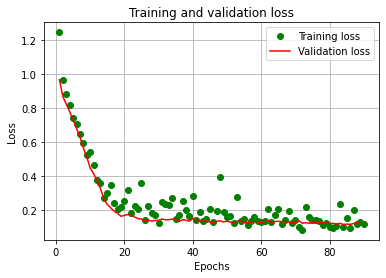

In [27]:
# graph of training and validation loss
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss,"go",label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()

In [28]:
# model evaluation
network.evaluate(X_test,y_test)

2/2 [==============================] - 0s 5ms/step - loss: 0.1558 - mae: 0.2791


[0.1558099240064621, 0.2790699303150177]

In [29]:
#model predictions 
#result=network.predict(X_test)
result_1=network.predict(X_test)
result_1[4]

array([0.78802276], dtype=float32)

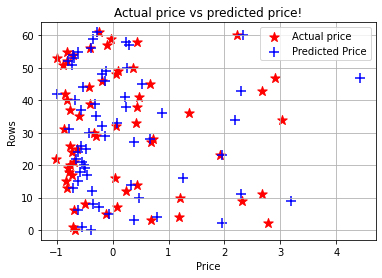

In [30]:
#graph of actual values and predicted values
y=result_1
y1=range(62)
x=y_test
plt.scatter(x, y1, label= "Actual price", color= "red", marker= "*", s=100)
plt.scatter(y, y1, label= "Predicted Price", color= "blue", marker= "+", s=100)
plt.xlabel('Price')
plt.ylabel('Rows')
plt.title('Actual price vs predicted price!')
plt.legend()
plt.grid()
plt.show()